In [66]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,Input
from keras import Sequential
from keras.datasets import mnist
from keras.models import Model

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


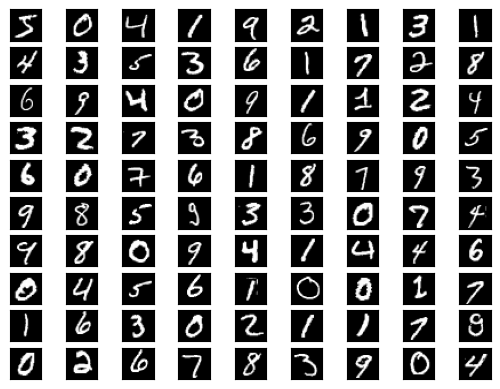

In [68]:
# Plot first few images
from matplotlib import pyplot
print(X_train.shape, y_train.shape)
print(X_test.shape , y_test.shape)

num_rows = 10  # Set the number of rows in the grid
num_cols = 9  # Set the number of columns in the grid
total_plots = num_rows * num_cols

for i in range(total_plots):
    pyplot.subplot(num_rows, num_cols, i + 1)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()



In [69]:
# '''The purpose of reshaping the dataset into a single channel format is to ensure  
# that the input images have a consistent shape and number of channels that match 
# the expectations of the subsequent code or model.'''
 
#convert dataset into singal chennal 
img_rows, img_cols = 28, 28

if k.image_data_format() == "channels_first":
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [70]:
# #convert from interger to float

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize into 0 to 1 range

X_train /= 255.0
X_test /= 255.0

In [71]:
#convert vectors into binary one hot encodeing
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [72]:
y_train.shape

(60000, 10)

In [73]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

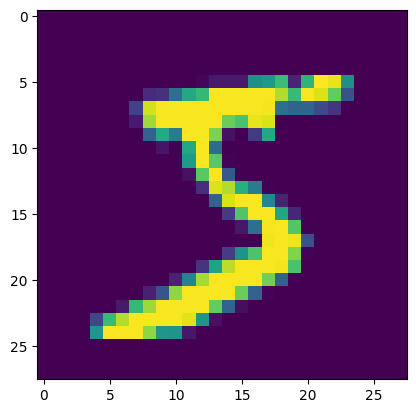

In [74]:
pyplot.imshow(X_train[0].reshape(28,28))

In [79]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 flatten_6 (Flatten)         (None, 15488)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1982592   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,002,698
Trainable params: 2,002,698
No

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9882

In [86]:
# save model
model.save('final_model.h5')